## <u>EJERCICIO 2</u>
### **CLASIFICACION CON REGRESION LOGISTICA - KNN - SVM**

### PASO 0 - Importo las librerias

In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, svm

### PASO 1 - Cargo el dataframe

In [19]:
dataset = load_wine()

x_originales = dataset.data
y_originales = dataset.target

### PASO 2a - Genero del dataset normalizado

In [20]:
# Datos de entrada

normalizador = StandardScaler()

x_normal = normalizador.fit_transform(x_originales)
x_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### PASO 2b - Divido datos de entrenamiento y test - Originales y normalizados

In [21]:
# Division en entrenamiento y test

porc_test = 0.3
seed = 12 #50 9 12

x_entrenar_original, x_test_original, y_entrenar_original, y_test_original = train_test_split(x_originales, y_originales, test_size=porc_test, random_state=seed, shuffle=True)
x_entrenar_normal, x_test_normal, y_entrenar_normal, y_test_normal = train_test_split(x_normal, y_originales, test_size=porc_test, random_state=seed, shuffle=True)

print(f"Entrenamiento original {x_entrenar_original.shape}")
print(f"Entrenamiento normalizado {x_entrenar_normal.shape}")
print(f"Testeo original {x_test_original.shape}")
print(f"Testeo normalizado {x_test_normal.shape}")


Entrenamiento original (124, 13)
Entrenamiento normalizado (124, 13)
Testeo original (54, 13)
Testeo normalizado (54, 13)


In [22]:
# Creo una funcion para el entrenamiento y matriz de confusion para los distintos modelos

def modelo(clasificador, x_entrenar, y_entrenar, x_test, y_test, clave):
    datos = {"Originales": "YlGn", "Normalizados": "OrRd"}
    clasificador.fit(x_entrenar, y_entrenar)
    print("\nAccuracy")
    print(f"Precision con datos {clave} {clasificador.score(x_test, y_test)}")
    y_prediccion = clasificador.predict(x_test)
    confm = confusion_matrix(y_test_normal, y_prediccion, labels=[0, 1, 2])
    print(f"\nMatriz de confusion con datos {clave}")
    print(confm)
    
    grafico = ConfusionMatrixDisplay.from_estimator(clasificador, x_test, y_test, cmap=datos[clave], display_labels=["Clase 0", "Clase 1", "Clase 2"])
    grafico.ax_.set_title(f"Grafico Matriz de confusion con datos {clave}")
    grafico.ax_.set_xlabel("Etiquetas de prediccion")
    grafico.ax_.set_ylabel("Etiquetas de testeo")
    return grafico

### PASO 3 - Modelo de regresion logistica - Valores originales y normalizados


Accuracy
Precision con datos Originales 0.9629629629629629

Matriz de confusion con datos Originales
[[20  0  0]
 [ 0 16  2]
 [ 0  0 16]]

Accuracy
Precision con datos Normalizados 0.9814814814814815

Matriz de confusion con datos Normalizados
[[20  0  0]
 [ 0 17  1]
 [ 0  0 16]]


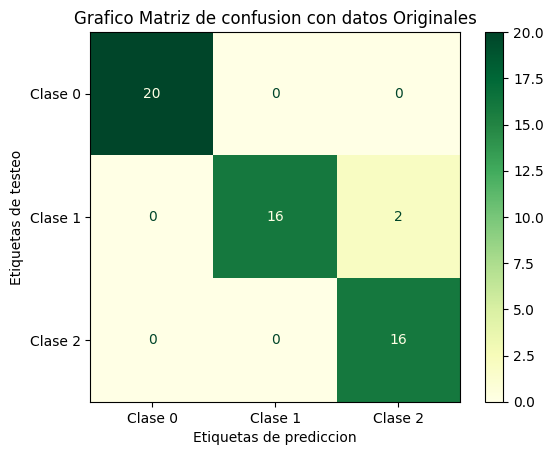

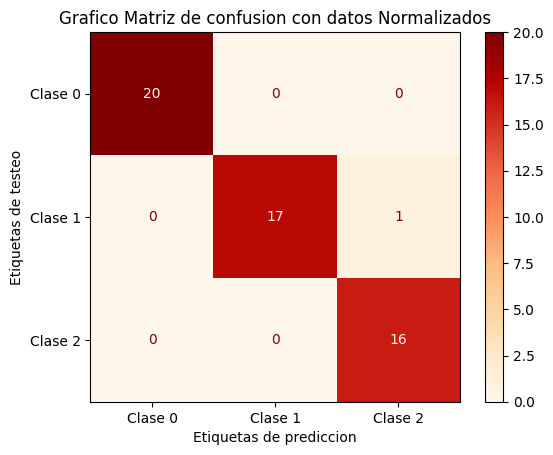

In [29]:
regresion_logistica = linear_model.LogisticRegression(solver='lbfgs', C=100, max_iter=10000, random_state=0)
modelo(regresion_logistica, x_entrenar_original, y_entrenar_original, x_test_original, y_test_original, "Originales")
modelo(regresion_logistica, x_entrenar_normal, y_entrenar_normal, x_test_normal, y_test_normal, "Normalizados")


### PASO 4 - Modelo de clasificacion por vecinos cercanos (KNN) - Valores originales y normalizados


Accuracy
Precision con datos Originales 0.7407407407407407

Matriz de confusion con datos Originales
[[18  0  2]
 [ 0 12  6]
 [ 0  6 10]]

Accuracy
Precision con datos Normalizados 0.9814814814814815

Matriz de confusion con datos Normalizados
[[20  0  0]
 [ 0 17  1]
 [ 0  0 16]]


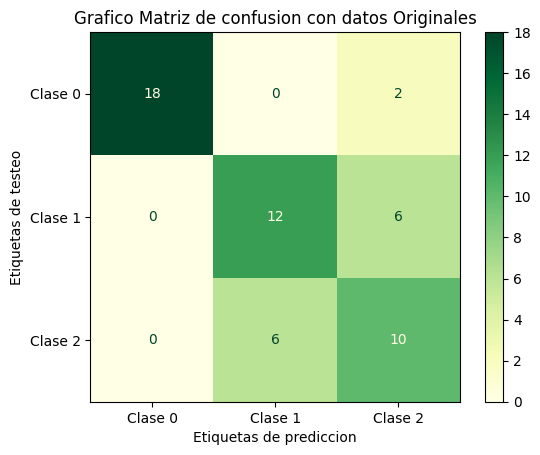

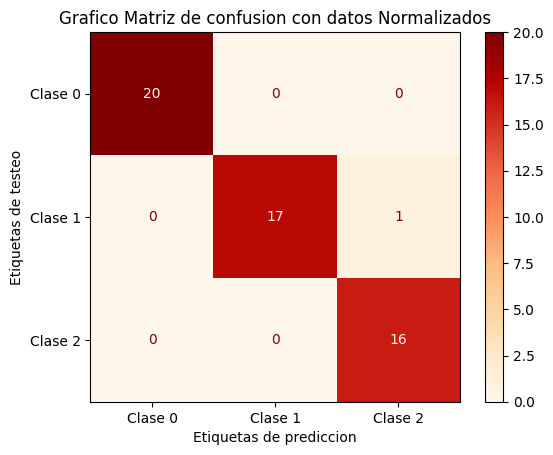

In [24]:
clasf_knn = neighbors.KNeighborsClassifier(10, weights="distance")
modelo(clasf_knn, x_entrenar_original, y_entrenar_original, x_test_original, y_test_original, "Originales")
modelo(clasf_knn, x_entrenar_normal, y_entrenar_normal, x_test_normal, y_test_normal, "Normalizados")

### PASO 5 - Modelo de clasificacion por SVM - Valores originales y normalizados


Accuracy
Precision con datos Originales 0.9629629629629629

Matriz de confusion con datos Originales
[[20  0  0]
 [ 0 16  2]
 [ 0  0 16]]

Accuracy
Precision con datos Normalizados 0.9814814814814815

Matriz de confusion con datos Normalizados
[[20  0  0]
 [ 0 17  1]
 [ 0  0 16]]


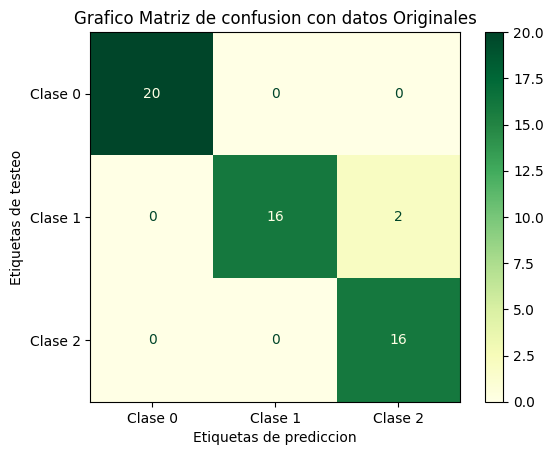

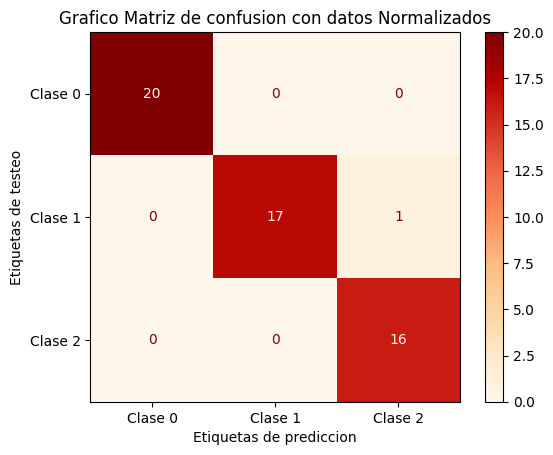

In [25]:
clasf_svm = svm.SVC(kernel='linear', C=1E7)
modelo(clasf_svm, x_entrenar_original, y_entrenar_original, x_test_original, y_test_original, "Originales")
modelo(clasf_svm, x_entrenar_normal, y_entrenar_normal, x_test_normal, y_test_normal, "Normalizados")

### PASO 6 - Conclusiones